In [0]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils as nu
import cv2
import json
import os

!rm master.zip
!rm -r FlagCNN-master
!wget https://github.com/Nickardson/FlagCNN/archive/master.zip
!unzip -q master.zip

images_path = 'FlagCNN-master/Images'
with open(os.path.join(images_path, 'flagMapping.json')) as f:
    flag_mapping = json.load(f)

print(flag_mapping)

flag_names = list(map(lambda record: record['code'], flag_mapping))
flag_dict = {k:v for (v,k) in enumerate(flag_names)}
images = []
labels = []

for filename in os.listdir(images_path):
    if (filename.endswith('.png')):
        path = os.path.join(images_path, filename)
        country_code = filename.split('-')[0]

        print(f'Adding {country_code} ({filename})')
        im = io.imread(path);
        im = im[:,:,:3] # get rid of transparency. 
        #res = cv2.resize(im, dsize=(23 * 40, 13 * 40), interpolation=cv2.INTER_CUBIC)
        #im = im.reshape((1,) + im.shape)
        if flag_dict.get(country_code):
            labels.append(flag_dict[country_code])
            images.append(im)
        else:
            print(f'Found image with no flag mapping: {country_code}')

labels = nu.to_categorical(labels)


--2020-04-26 16:35:21--  https://github.com/Nickardson/FlagCNN/archive/master.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Nickardson/FlagCNN/zip/master [following]
--2020-04-26 16:35:21--  https://codeload.github.com/Nickardson/FlagCNN/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [  <=>               ] 132.06M  17.3MB/s    in 8.1s    

2020-04-26 16:35:29 (16.4 MB/s) - ‘master.zip’ saved [138477328]

[{'name': 'Afghanistan', 'code': 'AF'}, {'name': 'Åland Islands', 'code': 'AX'}, {'name': 'Albania', 'code': 'AL'}, {'name': 'Algeria', 'code': 'DZ'}, {'name': 'American 

<Figure size 432x288 with 0 Axes>

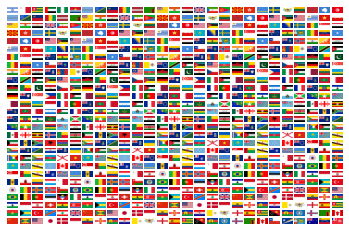

In [0]:
import math

width = math.ceil(math.sqrt(len(images)))
height = math.ceil(len(images) / width)
plt.figure()
f, ax = plt.subplots(width, height)
im = images.copy();
np.random.shuffle(im)

for i in range(width):
  for j in range(height):
    index = i*num + j
    if index < len(images):
      ax[i][j].axis('off')
      ax[i][j].imshow(im[index])
    #plt.show()

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import cv2
from PIL import Image
import tensorflow as tf


def recolor(image, r =0.07):
  return tf.image.adjust_hue(image=image, delta=r)
plt.figure()
d = ImageDataGenerator(preprocessing_function=recolor, rescale= 1./255,rotation_range=6, width_shift_range= 4, height_shift_range= 4, zoom_range= 0.3, brightness_range=[0.5, 1.5], channel_shift_range=0.5)
#it = td.flow(X, Y)
train_gen = d.flow(x=np.array(images), y=np.array(labels));
validation_datagen = ImageDataGenerator(rescale = 1./255);
# DO NOT DO THIS. I realized I used my train data set as my validation data set at the same time. This is bad. Do not cross contaminate. 
#thooough, the train dataset is all augmented
valid_gen = validation_datagen.flow(x = np.array(images), y = np.array(labels))

<Figure size 432x288 with 0 Axes>

### Augmented Images

In [0]:
import keras.layers as layers
import keras
cnn = keras.Sequential();

cnn.add(layers.Conv2D(filters = 32, kernel_size=(3,3),strides = (2,2), input_shape=images[0].shape, padding = 'same'))
cnn.add(layers.Activation('relu'))
cnn.add(layers.MaxPool2D(pool_size=(2,2), strides = 2))

cnn.add(layers.Conv2D(filters = 64, kernel_size=(2,2), strides = (1,1,), padding = 'valid'));
cnn.add(layers.Activation('relu'))
#cnn.add(layers.MaxPool2D(pool_size=(2,2), strides = 2))

cnn.add(layers.Flatten());
cnn.add(layers.Dense(64));
cnn.add(layers.Activation('relu'));
        
cnn.add(layers.Dropout(0.2));
        
cnn.add(layers.Dense(len(flag_names), activation='softmax'));

cnn.compile(loss="categorical_crossentropy", optimizer='adam', metrics = ['accuracy'])

Epoch 1/24
23/23 [==============================] - 6s 242ms/step - loss: 1.1234 - accuracy: 0.6444 - val_loss: 1.2948 - val_accuracy: 0.6187
Epoch 2/24
23/23 [==============================] - 6s 242ms/step - loss: 1.0265 - accuracy: 0.6792 - val_loss: 1.3057 - val_accuracy: 0.6169
Epoch 3/24
23/23 [==============================] - 6s 239ms/step - loss: 1.0573 - accuracy: 0.6958 - val_loss: 0.9526 - val_accuracy: 0.6301
Epoch 4/24
23/23 [==============================] - 6s 244ms/step - loss: 1.0318 - accuracy: 0.6685 - val_loss: 1.6902 - val_accuracy: 0.6144
Epoch 5/24
23/23 [==============================] - 6s 241ms/step - loss: 1.0557 - accuracy: 0.6676 - val_loss: 2.0159 - val_accuracy: 0.6052
Epoch 6/24
23/23 [==============================] - 6s 244ms/step - loss: 1.0239 - accuracy: 0.6819 - val_loss: 1.4206 - val_accuracy: 0.6167
Epoch 7/24
23/23 [==============================] - 5s 237ms/step - loss: 1.0169 - accuracy: 0.6780 - val_loss: 1.4932 - val_accuracy: 0.5916
Epoch 

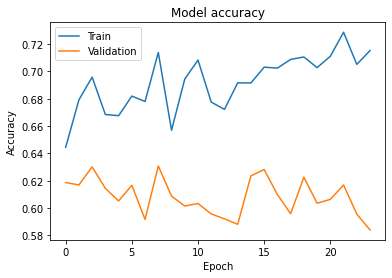

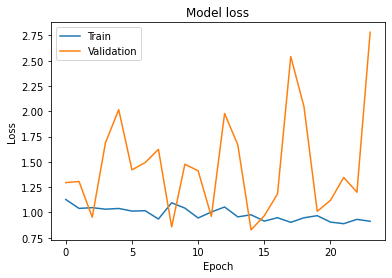

In [41]:
history = cnn.fit_generator(train_gen, steps_per_epoch=len(images) // 32, epochs=24, validation_data=valid_gen, validation_steps=len(images));

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#cnn.save("flag_cnn.h5")

In [0]:
cnn.save('keras.h5')

In [43]:
!pip install tensorflowjs
from google.colab import files
!mkdir model
!tensorflowjs_converter --input_format keras keras-36.h5 model/
!zip -r model.zip model 

files.download('model.zip')

mkdir: cannot create directory ‘model’: File exists
updating: model/ (stored 0%)
  adding: model/group1-shard1of1.bin (deflated 8%)
  adding: model/model.json (deflated 79%)
